In [ ]:
$ cd fsm
$ virtualenv -p python3 venv
$ pip install -r requirements.txt
$ ./env/bin/jupyter lab

## Data Science 101

<img src="./images/ds.png" style="width:700px;height:400px;">

### Data Science Process

<img src="./images/ds-cycle.png" style="width:400px;height:400px;">

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train_titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
pd.__version__

'1.0.1'

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1. Soru: Hayatta kalanlar yolcuların cinsiyet dağılımı nasıldır?


In [15]:
df[['Survived', 'Sex']]

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male
...,...,...
886,0,male
887,1,female
888,0,female
889,1,male


In [17]:
df.Survived == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

In [24]:
df[df.Survived == 1].groupby('Sex').size()

Sex
female    233
male      109
dtype: int64

In [26]:
df[df.Survived == 1]['Sex'].value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [28]:
round(df[df.Survived == 1]['Sex'].value_counts(normalize=True) * 100, 2)

female    68.13
male      31.87
Name: Sex, dtype: float64

### 2. Soru: Yolcuların cinsiyete göre sınıf dağılımları nasıldır?

In [31]:
pd.crosstab(df['Pclass'], df['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


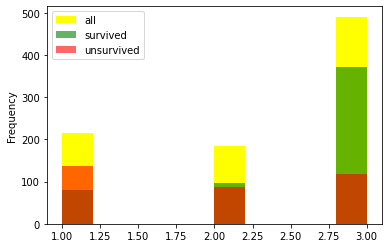

In [52]:
df['Pclass'].plot.hist(color='yellow', label='all')

df[df.Survived == 0]['Pclass'].plot.hist(color='green', alpha=.6, label='survived')
df[df.Survived == 1]['Pclass'].plot.hist(color='red', alpha=.6, label='unsurvived')
plt.legend(loc='upper left');

### 3. Soru: Bilet ücretlerinin ortalaması ve standart sapmaları

In [ ]:
help()

* axis = 0 ROW
* axis = 1 COLUMN

In [53]:
print('Fare Ortalama: ', df['Fare'].mean())

Fare Ortalama:  32.204207968574636


In [54]:
print('Fare Std: ', df['Fare'].std())

Fare Std:  49.6934285971809


### 4. Soru: Hayatta kalan yolcularin yaş dağılımlarını nasıldır?

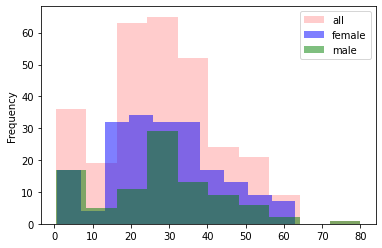

In [72]:
df[df.Survived == 1]['Age'].plot.hist(color='red', alpha=.2, label='all')

df[(df.Survived == 1) & (df.Sex == 'female')]['Age'].plot.hist(color='blue', alpha=.5, label='female')
df[(df.Survived == 1) & (df.Sex == 'male')]['Age'].plot.hist(color='green', alpha=.5, label='male')

plt.legend();

In [73]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [75]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### 5. Soru: SibSp ve Parch değerlerini kullanarak toplam akraba sayısını gösteren yeni bir alan oluşturun

In [76]:
df['parent'] = df['SibSp'] + df['Parch'] + 1 # kardesler + akraba + kendisi (1)

In [77]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,parent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### 6. Soru: Özellikler arasındaki correlation değerleri nasıldır?

In [79]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,parent
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138
parent,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000


In [80]:
import seaborn as sns
sns.set()

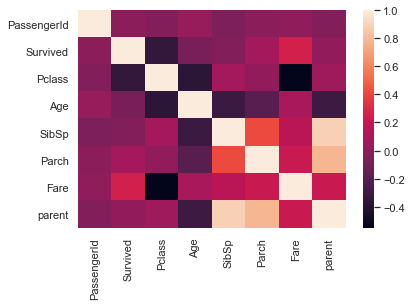

In [84]:
sns.heatmap(df.corr())

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,parent
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


### Modelleme Zamanı



In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Eksik olan Embarked degerlerini en cok deger ile guncelle

In [4]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [5]:
df.Embarked.fillna('S', inplace=True)

In [6]:
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

#### Age değeri olmayan yolcuları çıkartalım

In [7]:
df_new =  df[~df.Age.isnull()].copy()

In [8]:
df_new.shape

(714, 12)

In [12]:
X_train, X_test, y_train, y_test = \
    train_test_split(df_new.drop(labels=['Survived'], axis=1), df_new.Survived, test_size=.2, stratify=df_new.Survived)

In [13]:
X_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
311,312,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.375,B57 B59 B63 B66,C
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.750,NaN,S
657,658,3,"Bourke, Mrs. John (Catherine)",female,32.00,1,1,364849,15.500,NaN,Q
799,800,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.00,1,1,345773,24.150,NaN,S
717,718,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.00,0,0,34218,10.500,E101,S


In [14]:
X_train.shape, X_test.shape

((571, 11), (143, 11))

In [15]:
X_train.Embarked.unique()

array(['C', 'S', 'Q'], dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder().fit(X_train.Embarked)

In [18]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

In [19]:
le.inverse_transform([0])

array(['C'], dtype=object)

In [20]:
X_train['label_embarked'] = le.transform(X_train.Embarked)

In [21]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train[['label_embarked', 'Age']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
lr.score(X_train[['label_embarked', 'Age']], y_train)

0.6357267950963222

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe = OneHotEncoder().fit(X_train[['label_embarked']])

In [29]:
label_embarked_ohe = ohe.transform(X_train[['label_embarked']])

In [37]:
df_ohe_embarked = pd.DataFrame(label_embarked_ohe.toarray()).reset_index().drop('index', axis=1)

In [41]:
X_train_ohe_age = pd.concat([df_ohe_embarked, X_train['Age'].reset_index().drop('index', axis=1)], axis=1)

In [43]:
X_train_ohe_age.head()

,0,1,2,Age
0,1.0,0.0,0.0,18.00
1,0.0,0.0,1.0,0.83
2,0.0,1.0,0.0,32.00
3,0.0,0.0,1.0,30.00
4,0.0,0.0,1.0,27.00


In [34]:
lr.fit(X_train_ohe_age, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
lr.score(X_train_ohe_age, y_train)

0.6392294220665499

#### Age alanını scale etmeliyiz ve pclass yerine farklı alanları kullanmaya çalışalım. Örneğin: sex

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
mms = MinMaxScaler().fit(X_train['Age'].values.reshape(-1,1))

X_train['age_scaler'] = mms.transform(X_train['Age'].values.reshape(-1,1))

In [53]:
X_train['sex_binary'] = X_train['Sex'].map({'male': 0, 'female':1})

In [81]:
lr.fit(X_train[['age_scaler', 'sex_binary']], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
lr.score(X_train[['age_scaler', 'sex_binary']], y_train)

0.7863397548161121

%63'ten %78 oranına çıkarttık!

In [83]:
X_test['age_scaler'] = mms.transform(X_test['Age'].values.reshape(-1,1))
X_test['sex_binary'] = X_test['Sex'].map({'male': 0, 'female':1})

In [84]:
lr.score(X_test[['age_scaler', 'sex_binary']], y_test)

0.7552447552447552

NEXT: Oranı olabildiğinde yüksek tutmak için farklı feature özelliklerine gidilmeli (yeni feature kolonlari - (belki yaş aralıklarını cluster'larayarak modele vermek modelin performansını arttırabilir!))